In [1]:
import numpy as np
import pandas as pd


In [2]:
data = pd.read_csv('data/Train.csv',encoding='latin1',parse_dates=['DOB','Lead_Creation_Date'])

In [3]:
#usuwamy kolumne LoggedIn
data.drop(['LoggedIn'],axis=1,inplace=True)

In [4]:
#kolumna ID to identyfikator klienta i usuwamy ja od razu
data.drop(['ID'],axis=1,inplace=True)

In [5]:
data

,Gender,City,Monthly_Income,DOB,Lead_Creation_Date,Loan_Amount_Applied,Loan_Tenure_Applied,Existing_EMI,Employer_Name,Salary_Account,...,Loan_Tenure_Submitted,Interest_Rate,Processing_Fee,EMI_Loan_Submitted,Filled_Form,Device_Type,Var2,Source,Var4,Disbursed
0,Female,Delhi,20000,1978-05-23,2015-05-15,300000.0,5.0,0.0,CYBOSOL,HDFC Bank,...,NaN,NaN,NaN,NaN,N,Web-browser,G,S122,1,0
1,Male,Mumbai,35000,1985-10-07,2015-05-04,200000.0,2.0,0.0,TATA CONSULTANCY SERVICES LTD (TCS),ICICI Bank,...,2.0,13.25,NaN,6762.90,N,Web-browser,G,S122,3,0
2,Male,Panchkula,22500,1981-10-10,2015-05-19,600000.0,4.0,0.0,ALCHEMIST HOSPITALS LTD,State Bank of India,...,4.0,NaN,NaN,NaN,N,Web-browser,B,S143,1,0
3,Male,Saharsa,35000,1987-11-30,2015-05-09,1000000.0,5.0,0.0,BIHAR GOVERNMENT,State Bank of India,...,5.0,NaN,NaN,NaN,N,Web-browser,B,S143,3,0
4,Male,Bengaluru,100000,1984-02-17,2015-05-20,500000.0,2.0,25000.0,GLOBAL EDGE SOFTWARE,HDFC Bank,...,2.0,NaN,NaN,NaN,N,Web-browser,B,S134,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87015,Female,Ajmer,71901,2069-11-27,2015-07-31,1000000.0,5.0,14500.0,MAYO COLLEGE,ICICI Bank,...,NaN,NaN,NaN,NaN,N,Web-browser,G,S122,3,0
87016,Female,Kochi,16000,1990-12-01,2015-07-31,0.0,0.0,0.0,KERALA COMMUNICATORS CABLE LTD,Federal Bank,...,4.0,35.50,4800.0,9425.76,Y,Mobile,G,S122,5,0
87017,Male,Bengaluru,118000,1972-01-28,2015-07-31,0.0,0.0,0.0,BANGALORE INSTITUTE OF TECHNOLOGY,Syndicate Bank,...,4.0,NaN,NaN,NaN,N,Mobile,G,S122,3,0
87018,Male,Bengaluru,98930,1977-04-27,2015-07-31,800000.0,5.0,13660.0,FIRSTSOURCE SOLUTION LTD,ICICI Bank,...,5.0,NaN,NaN,NaN,N,Web-browser,G,S122,3,0


In [6]:
y = data['Disbursed']
X = data.drop(['Disbursed'],axis=1)

In [7]:
y.value_counts()

0    85747
1     1273
Name: Disbursed, dtype: int64

## Analiza danych

In [8]:
def calc_missing_values(column):
    #liczba brakujacych danych
    x_total = column.shape[0]
    x_missing = column.isnull().sum()
    print('missing percentage: '+str((x_missing/x_total)*100))

In [9]:
#typy zmiennych
X.dtypes

Gender                           object
City                             object
Monthly_Income                    int64
DOB                      datetime64[ns]
Lead_Creation_Date       datetime64[ns]
Loan_Amount_Applied             float64
Loan_Tenure_Applied             float64
Existing_EMI                    float64
Employer_Name                    object
Salary_Account                   object
Mobile_Verified                  object
Var5                              int64
Var1                             object
Loan_Amount_Submitted           float64
Loan_Tenure_Submitted           float64
Interest_Rate                   float64
Processing_Fee                  float64
EMI_Loan_Submitted              float64
Filled_Form                      object
Device_Type                      object
Var2                             object
Source                           object
Var4                              int64
dtype: object

In [10]:
#sprawdzenie ktore kolumny zawieraja NaN-y
X.isna().any()

Gender                   False
City                      True
Monthly_Income           False
DOB                      False
Lead_Creation_Date       False
Loan_Amount_Applied       True
Loan_Tenure_Applied       True
Existing_EMI              True
Employer_Name             True
Salary_Account            True
Mobile_Verified          False
Var5                     False
Var1                     False
Loan_Amount_Submitted     True
Loan_Tenure_Submitted     True
Interest_Rate             True
Processing_Fee            True
EMI_Loan_Submitted        True
Filled_Form              False
Device_Type              False
Var2                     False
Source                   False
Var4                     False
dtype: bool

In [11]:
#sprawdzenie ile Nan-ow w kolumnach
X.isna().sum()


Gender                       0
City                      1003
Monthly_Income               0
DOB                          0
Lead_Creation_Date           0
Loan_Amount_Applied         71
Loan_Tenure_Applied         71
Existing_EMI                71
Employer_Name               71
Salary_Account           11764
Mobile_Verified              0
Var5                         0
Var1                         0
Loan_Amount_Submitted    34613
Loan_Tenure_Submitted    34613
Interest_Rate            59294
Processing_Fee           59600
EMI_Loan_Submitted       59294
Filled_Form                  0
Device_Type                  0
Var2                         0
Source                       0
Var4                         0
dtype: int64

In [12]:
#kolumna Gender - zmienna kategoryczna
X['Gender'].value_counts()

Male      49848
Female    37172
Name: Gender, dtype: int64

(array([37172.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 49848.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

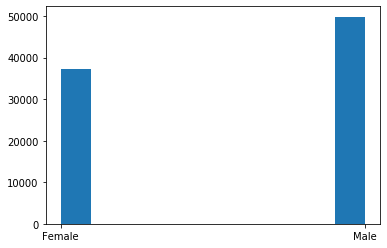

In [13]:
#rozklad zmiennych
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(X['Gender'],bins=10)

In [14]:
#modyfikacje zmiennej
#Mobile_Verfied encodujemy na 1 - y 0 - n 
X['Gender'] = X['Gender'].replace({"Male":1, "Female":0})

In [15]:
#zmienna City - kategoryczna
X['City'].value_counts()

Delhi             12527
Bengaluru         10824
Mumbai            10795
Hyderabad          7272
Chennai            6916
                  ...  
DHANDHUKA             1
Sheikhpura            1
Champawat             1
CHIKHLI (GUJ.)        1
Umaria                1
Name: City, Length: 697, dtype: int64

In [16]:
#liczba brakujacych danych
calc_missing_values(X['City'])

missing percentage: 1.1526085957251206


In [17]:
X['City'].describe()

count     86017
unique      697
top       Delhi
freq      12527
Name: City, dtype: object

In [18]:
#brakujace wartosci mozna uzupelnic most frequent
#rozklad zmiennych
#plt.hist(X[X['City'] == 'Baksa'],bins=10)

In [19]:
#PROCESSING NAN
#wypełniamy najczęstszym miastem
X['City'] = X['City'].fillna(X['City'].mode()[0])


In [20]:
#kolumna Monthly income - zmienna numeryczna
X['Monthly_Income'].value_counts()

25000    5823
20000    4523
15000    4246
30000    3216
50000    2392
         ... 
21612       1
58490       1
15521       1
33974       1
36978       1
Name: Monthly_Income, Length: 5825, dtype: int64

In [21]:
calc_missing_values(X['Monthly_Income'])

missing percentage: 0.0


In [22]:
#statystyki dla zmiennej 
X['Monthly_Income'].describe()

count    8.702000e+04
mean     5.884997e+04
std      2.177511e+06
min      0.000000e+00
25%      1.650000e+04
50%      2.500000e+04
75%      4.000000e+04
max      4.445544e+08
Name: Monthly_Income, dtype: float64

In [23]:
X['Monthly_Income'].skew()

167.56052617705805

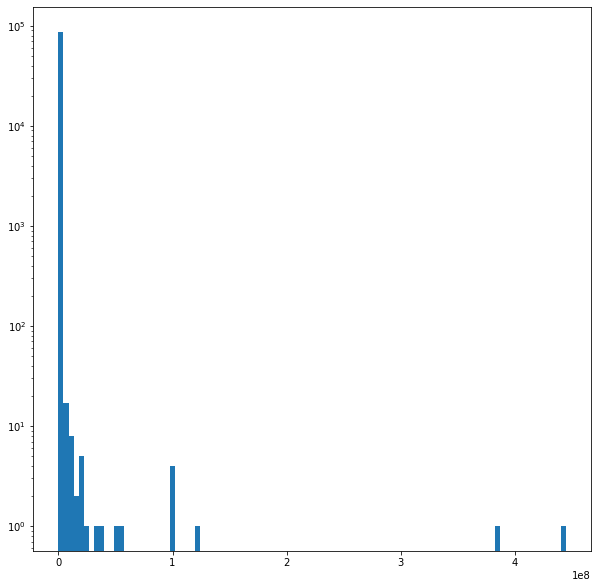

In [24]:
#rozklad zmiennych
plt.figure(figsize=(10,10))
plt.hist(X['Monthly_Income'],bins=100)
plt.yscale('log')
#plt.xscale('log')

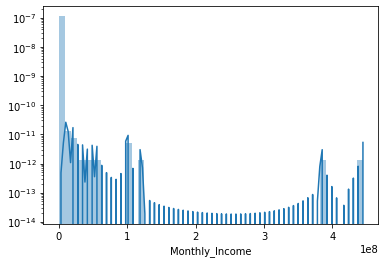

In [25]:
#rozklad zmiennych
import seaborn as sns
sns.distplot(X['Monthly_Income'])
plt.yscale('log')
plt.show()

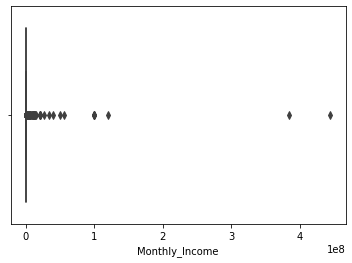

In [26]:
#boxplot outliers
import seaborn as sns
sns.boxplot(x=X['Monthly_Income'])

In [27]:
#PROCESSING SKEWNEES
#rozkład poprawiamy przez sqrt()
X['Monthly_Income'] = np.log(X['Monthly_Income']+0.001)

In [28]:
#rozklad zmiennych po konwersji log()
#aby zrobic konwersje trzeba wartosc 0.0 zamienic na bardzo male 0.000001
#rozklad zmiennych
#x_tmp = x
#x_tmp.loc[x_tmp['Monthly_Income'] == 0] = 0.000001
#plt.figure(figsize=(10,10))
#plt.hist(np.log(x_tmp['Monthly_Income']),bins=100)
#plt.yscale('log')
#plt.xscale('log')

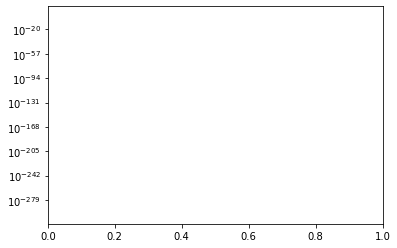

In [29]:
#rozklad zmiennych
import seaborn as sns
#sns.distplot(np.log(x_tmp['Monthly_Income']))
plt.yscale('log')
plt.show()

In [30]:
#zmienna DOB - data
X['DOB'].value_counts()

1980-11-11    306
1970-01-02    226
1970-01-01    148
1990-01-01    131
1980-01-01    111
             ... 
1994-12-09      1
2050-05-20      1
2068-08-25      1
2060-11-30      1
2062-06-24      1
Name: DOB, Length: 11345, dtype: int64

In [31]:
#brakujace wartosci
calc_missing_values(X['DOB'])

missing percentage: 0.0


In [32]:
X['DOB']

0       1978-05-23
1       1985-10-07
2       1981-10-10
3       1987-11-30
4       1984-02-17
           ...    
87015   2069-11-27
87016   1990-12-01
87017   1972-01-28
87018   1977-04-27
87019   1988-10-31
Name: DOB, Length: 87020, dtype: datetime64[ns]

In [33]:
X.loc[X['DOB'] > pd.to_datetime('2015-01-01 00:00:00') ]

,Gender,City,Monthly_Income,DOB,Lead_Creation_Date,Loan_Amount_Applied,Loan_Tenure_Applied,Existing_EMI,Employer_Name,Salary_Account,...,Loan_Amount_Submitted,Loan_Tenure_Submitted,Interest_Rate,Processing_Fee,EMI_Loan_Submitted,Filled_Form,Device_Type,Var2,Source,Var4
34,1,Mumbai,10.933107,2064-05-28,2015-05-01,500000.0,5.0,14500.0,TEJCONTROL SYSTEMS PVT LTD,HDFC Bank,...,500000.0,5.0,NaN,NaN,NaN,N,Web-browser,E,S133,3
58,1,Mumbai,10.714418,2050-05-20,2015-05-01,0.0,0.0,0.0,XHZ,ICICI Bank,...,940000.0,5.0,NaN,NaN,NaN,N,Web-browser,B,S133,2
89,1,Vijayawada,13.304685,2068-04-01,2015-05-01,1000000.0,5.0,15000.0,GOPALA KRISHNA,State Bank of India,...,1000000.0,5.0,NaN,NaN,NaN,N,Web-browser,B,S133,3
92,0,Dibrugarh,11.928341,2059-10-21,2015-05-01,2000000.0,5.0,37500.0,B.C.DAS,Allahabad Bank,...,NaN,NaN,NaN,NaN,NaN,N,Web-browser,B,S133,3
125,1,Hyderabad,11.002100,2066-03-04,2015-05-01,300000.0,3.0,17000.0,AIRINDIA,Vijaya Bank,...,300000.0,3.0,14.85,6000.0,10377.58,Y,Web-browser,B,S122,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86998,1,Ahmedabad,10.714418,2056-08-31,2015-07-31,0.0,0.0,0.0,BHARAT SANCHAR NIGAM LTD (BSNL),Corporation bank,...,810000.0,4.0,14.85,16200.0,22481.36,Y,Mobile,G,S122,5
87000,0,Palwal,10.849803,2062-11-01,2015-07-31,300000.0,5.0,23648.0,DHBVN,HDFC Bank,...,NaN,NaN,NaN,NaN,NaN,N,Web-browser,G,S122,1
87003,1,Rajkot,10.596635,2060-01-01,2015-07-31,700000.0,0.0,8450.0,KJO,Bank of India,...,570000.0,4.0,NaN,NaN,NaN,N,Web-browser,G,S122,3
87005,1,Nellore,11.661345,2069-02-21,2015-07-31,1000000.0,5.0,0.0,APTRANSCO,Axis Bank,...,1000000.0,5.0,15.75,15000.0,36278.14,N,Web-browser,G,S122,3


In [34]:
#tworzymy nowa kolumne wiek 'AGE'
def create_age_from_dob(data):
    #z DOB robimy sobie Wiek aplikujacego o kredyt przyjmiemy rok 2015 jako rok bazowy
    data['AGE'] = data['DOB'].apply(lambda xval: int((pd.to_datetime('2015-12-30 00:00:00') - xval)/np.timedelta64(1, 'Y')))
    #dane z ujemnym wiekiem uzypelniamy wartoscia srednia z danych ktore sa prawidłow wypelnione czyli DOB < 2015
    data.loc[ X['AGE'] <= 0, 'AGE' ] = data.loc[X['AGE'] > 0 ]['AGE'].mean()
    

In [35]:
create_age_from_dob(X)

In [36]:
X['AGE'].describe()

count    87020.000000
mean        29.789688
std          5.154943
min         18.000000
25%         26.000000
50%         29.000000
75%         33.000000
max         45.000000
Name: AGE, dtype: float64

In [37]:
X['AGE'].skew()

0.7274690305792898

(array([ 123.,  211.,    0.,  482.,    0.,  971.,    0., 1946.,    0.,
        3410.,    0., 4541., 6216.,    0., 6646.,    0., 7118.,    0.,
        6766.,    0., 6443., 4433., 5947.,    0., 5103., 4563.,    0.,
        3933.,    0., 3126.,    0., 3353.,    0., 2130.,    0., 1809.,
           0., 1455., 1241.,    0., 1151.,    0.,  910.,    0.,  773.,
           0.,  705.,    0.,  571.,  944.]),
 array([18.  , 18.54, 19.08, 19.62, 20.16, 20.7 , 21.24, 21.78, 22.32,
        22.86, 23.4 , 23.94, 24.48, 25.02, 25.56, 26.1 , 26.64, 27.18,
        27.72, 28.26, 28.8 , 29.34, 29.88, 30.42, 30.96, 31.5 , 32.04,
        32.58, 33.12, 33.66, 34.2 , 34.74, 35.28, 35.82, 36.36, 36.9 ,
        37.44, 37.98, 38.52, 39.06, 39.6 , 40.14, 40.68, 41.22, 41.76,
        42.3 , 42.84, 43.38, 43.92, 44.46, 45.  ]),
 <a list of 50 Patch objects>)

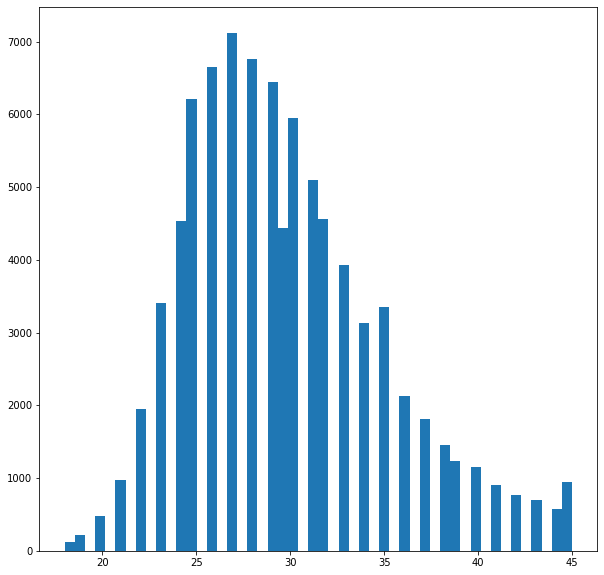

In [38]:
#rozklad zmiennych
plt.figure(figsize=(10,10))
plt.hist(X['AGE'],bins=50)
#plt.yscale('log')
#plt.xscale('log')

In [39]:
#zmienna Lead Creation Date
X['Lead_Creation_Date'].value_counts()

2015-07-03    2315
2015-07-23    1994
2015-07-30    1297
2015-07-27    1292
2015-07-31    1268
              ... 
2015-05-24     502
2015-05-31     498
2015-07-12     475
2015-05-10     459
2015-06-14     373
Name: Lead_Creation_Date, Length: 92, dtype: int64

In [40]:
#brakujace wartosci
calc_missing_values(X['Lead_Creation_Date'])

missing percentage: 0.0


In [41]:
#daty trzeba przerobic
#rozklad zmiennych
plt.figure(figsize=(10,10))
#plt.plot(X['Lead_Creation_Date'].year)
#plt.yscale('log')
#plt.xscale('log')

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

In [42]:
# zmienna Loan_Amount_Applied numeryczna
X['Loan_Amount_Applied'].value_counts()

0.0          28853
100000.0     14311
200000.0     13058
300000.0      9995
500000.0      9762
             ...  
560000.0         1
475000.0         1
460000.0         1
1405000.0        1
204000.0         1
Name: Loan_Amount_Applied, Length: 277, dtype: int64

In [43]:
#brakujace wartości
calc_missing_values(X['Loan_Amount_Applied'])

missing percentage: 0.08159043897954493


In [44]:
#statystyki dla zmiennej 
X['Loan_Amount_Applied'].describe()

count    8.694900e+04
mean     2.302507e+05
std      3.542068e+05
min      0.000000e+00
25%      0.000000e+00
50%      1.000000e+05
75%      3.000000e+05
max      1.000000e+07
Name: Loan_Amount_Applied, dtype: float64

In [45]:
X['Loan_Amount_Applied'].skew()

5.641871279754185

C:\Users\darek\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\darek\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


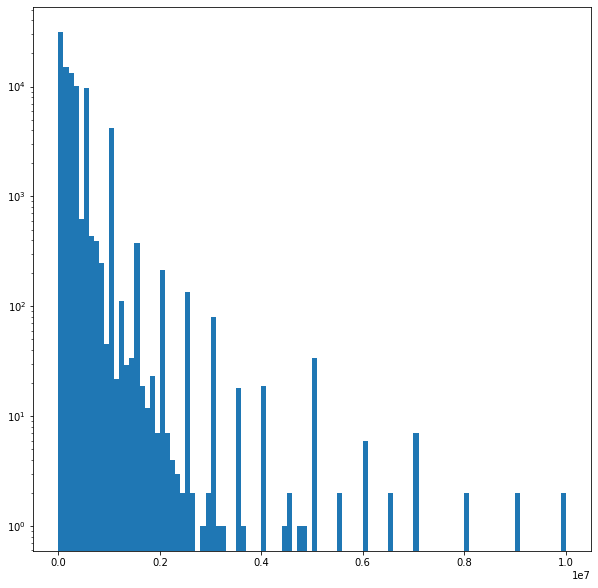

In [46]:
#rozklad zmiennych
plt.figure(figsize=(10,10))
plt.hist(X['Loan_Amount_Applied'],bins=100)
plt.yscale('log')
#plt.xscale('log')

In [47]:
#PROCESSING NAN
#brakujace wartosci uzupelniamy wartoscia srednia zaokraglonoa w gore
X['Loan_Amount_Applied'] = X['Loan_Amount_Applied'].fillna((X['Loan_Amount_Applied'].mean()))

In [48]:
#PROCESSING SKEWNEES
#rozkład poprawiamy przez sqrt()
X['Loan_Amount_Applied'] = np.log(X['Loan_Amount_Applied']+0.001)

In [49]:
X['Loan_Amount_Applied'].skew()

-0.6946018276417825

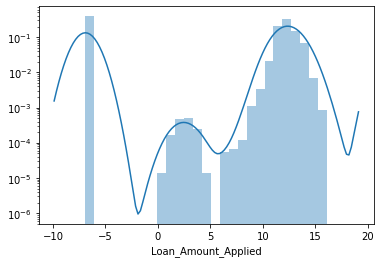

In [50]:
#rozklad zmiennych
import seaborn as sns
sns.distplot(X['Loan_Amount_Applied'])
plt.yscale('log')
plt.show()

In [51]:
# zmienna Loan_Amount_Applied numeryczna
X['Loan_Tenure_Applied'].value_counts()

0.0     33844
5.0     19083
3.0     13080
2.0      9463
4.0      6620
1.0      4812
10.0       40
7.0         3
6.0         2
9.0         1
8.0         1
Name: Loan_Tenure_Applied, dtype: int64

In [52]:
#brakujace wartości
calc_missing_values(X['Loan_Tenure_Applied'])

missing percentage: 0.08159043897954493


In [53]:
#statystyki dla zmiennej 
X['Loan_Tenure_Applied'].describe()

count    86949.000000
mean         2.131399
std          2.014193
min          0.000000
25%          0.000000
50%          2.000000
75%          4.000000
max         10.000000
Name: Loan_Tenure_Applied, dtype: float64

In [54]:
X['Loan_Tenure_Applied'].skew()

0.26462404804244716

C:\Users\darek\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\darek\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([3.3844e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        4.8120e+03, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        9.4630e+03, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.3080e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        6.6200e+03, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.9083e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        2.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        3.0000e+00, 0.0000e+00, 0.0000e+00, 0.00

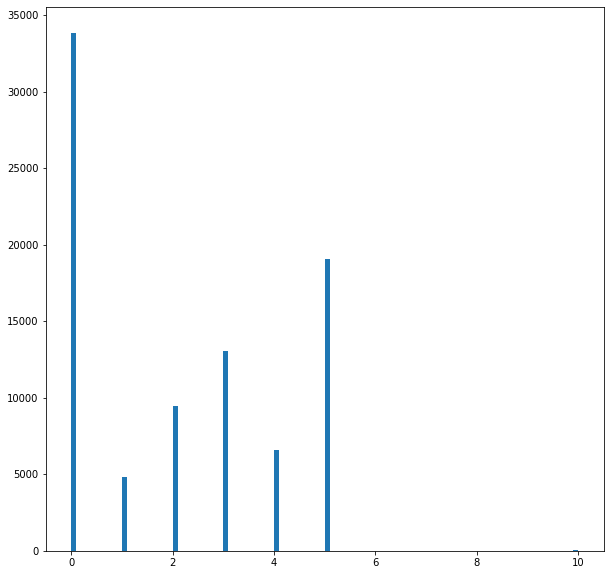

In [55]:
#rozklad zmiennych
plt.figure(figsize=(10,10))
plt.hist(X['Loan_Tenure_Applied'],bins=100)
#plt.yscale('log')
#plt.xscale('log')

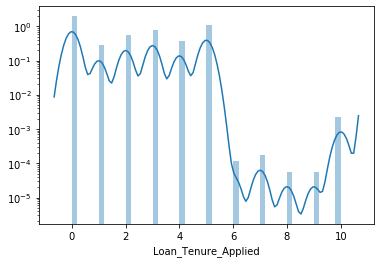

In [56]:
#rozklad zmiennych
import seaborn as sns
sns.distplot(X['Loan_Tenure_Applied'])
plt.yscale('log')
plt.show()

In [57]:
#PROCESSING NAN
#brakujace wartosci uzupelniamy wartoscia srednia zaokraglonoa w gore
X['Loan_Tenure_Applied'] = X['Loan_Tenure_Applied'].fillna((np.ceil(X['Loan_Tenure_Applied'].mean())))

In [58]:
#zmienna Existing_EMI
X['Existing_EMI'].value_counts()

0.0        58238
5000.0      2695
10000.0     1737
3000.0      1581
4000.0      1226
           ...  
11036.0        1
1703.0         1
2335.0         1
2936.0         1
1543.0         1
Name: Existing_EMI, Length: 3753, dtype: int64

In [59]:
#brakujace wartości
calc_missing_values(X['Existing_EMI'])

missing percentage: 0.08159043897954493


In [60]:
#statystyki dla zmiennej 
X['Existing_EMI'].describe()

count    8.694900e+04
mean     3.696228e+03
std      3.981021e+04
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      3.500000e+03
max      1.000000e+07
Name: Existing_EMI, dtype: float64

In [61]:
X['Existing_EMI'].skew()

211.7693511145207

C:\Users\darek\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\darek\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


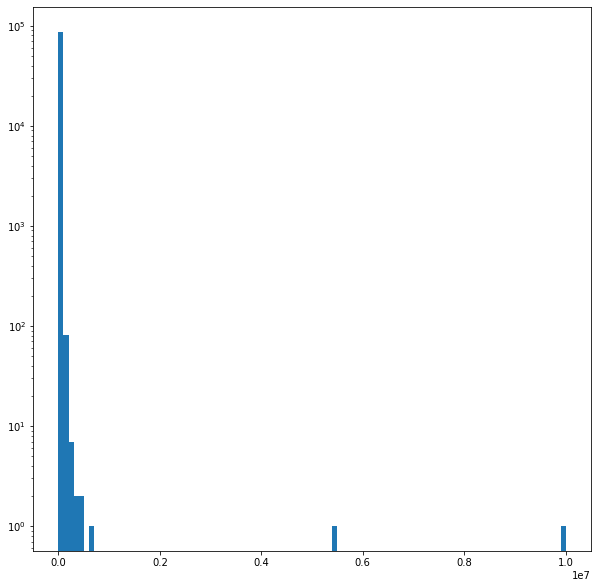

In [62]:
#rozklad zmiennych
plt.figure(figsize=(10,10))
plt.hist(X['Existing_EMI'],bins=100)
plt.yscale('log')
#plt.xscale('log')

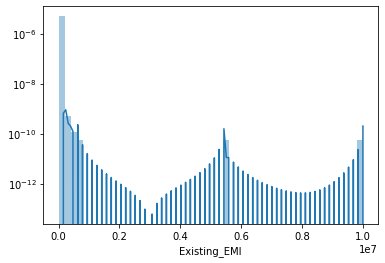

In [63]:
#rozklad zmiennych
import seaborn as sns
sns.distplot(X['Existing_EMI'])
plt.yscale('log')
plt.show()

In [64]:
#PROCESSING NAN
#brakujace wartosci uzupelniamy wartoscia srednia zaokraglonoa w gore
X['Existing_EMI'] = X['Existing_EMI'].fillna((X['Existing_EMI'].mean()))

In [65]:
#PROCESSING SKEWNEES
#rozkład poprawiamy przez sqrt()
X['Existing_EMI'] = np.log(X['Existing_EMI']+0.001)

In [66]:
#zmienna Employer_Name
X['Employer_Name'].value_counts()

0                                               4914
TATA CONSULTANCY SERVICES LTD (TCS)              550
COGNIZANT TECHNOLOGY SOLUTIONS INDIA PVT LTD     404
ACCENTURE SERVICES PVT LTD                       324
GOOGLE                                           301
                                                ... 
LABEAST INSTRUMENT                                 1
HEMANT SHINDE                                      1
DELHI POLIC PUBLIC SCHOOL,DEHRADUN                 1
OM SINGH                                           1
M K ASSOSIATES                                     1
Name: Employer_Name, Length: 43567, dtype: int64

In [67]:
#brakujace wartości
calc_missing_values(X['Employer_Name'])

missing percentage: 0.08159043897954493


In [68]:
#statystyki dla zmiennej 
X['Employer_Name'].describe()

count     86949
unique    43567
top           0
freq       4914
Name: Employer_Name, dtype: object

In [69]:
#poniewaz w danych istnieja nany
#X['Employer_Name'] = X['Employer_Name'].fillna('na')
#poniewaz nan i nieokreslonych jest <0.82% to mozemy wypelnic most frequent

In [70]:
#rozklad zmiennych
plt.figure(figsize=(10,10))
#plt.hist(X['Employer_Name'],bins=43568)
#plt.yscale('log')
#plt.xscale('log')

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

In [71]:
#zmienna 'Employer_Name' zamieniamy na 1 gdy obecny 0 gdy nan, 1 ma zatrudnienie 0 - brak zatrudnienia
def prepare_employer_name(data):
    data['Employer_Name'] = np.where(data['Employer_Name'].isnull(), 0, 1)

In [72]:
prepare_employer_name(X)
X.dtypes

Gender                            int64
City                             object
Monthly_Income                  float64
DOB                      datetime64[ns]
Lead_Creation_Date       datetime64[ns]
Loan_Amount_Applied             float64
Loan_Tenure_Applied             float64
Existing_EMI                    float64
Employer_Name                     int32
Salary_Account                   object
Mobile_Verified                  object
Var5                              int64
Var1                             object
Loan_Amount_Submitted           float64
Loan_Tenure_Submitted           float64
Interest_Rate                   float64
Processing_Fee                  float64
EMI_Loan_Submitted              float64
Filled_Form                      object
Device_Type                      object
Var2                             object
Source                           object
Var4                              int64
AGE                             float64
dtype: object

In [73]:
#zmienna Employer_Name
X['Salary_Account'].value_counts()

HDFC Bank                                          17695
ICICI Bank                                         13636
State Bank of India                                11843
Axis Bank                                           8783
Citibank                                            2376
Kotak Bank                                          2067
IDBI Bank                                           1550
Punjab National Bank                                1201
Bank of India                                       1170
Bank of Baroda                                      1126
Standard Chartered Bank                              995
Canara Bank                                          990
Union Bank of India                                  951
Yes Bank                                             779
ING Vysya                                            678
Corporation bank                                     649
Indian Overseas Bank                                 612
State Bank of Hyderabad        

In [74]:
#brakujace wartości
calc_missing_values(X['Salary_Account'])

missing percentage: 13.518731326131924


In [75]:
#statystyki dla zmiennej 
X['Salary_Account'].describe()

count         75256
unique           57
top       HDFC Bank
freq          17695
Name: Salary_Account, dtype: object

In [76]:
#poniewaz w danych istnieja nany
X['Salary_Account'] = X['Salary_Account'].fillna('na')

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57],
 <a list of 58 Text xticklabel objects>)

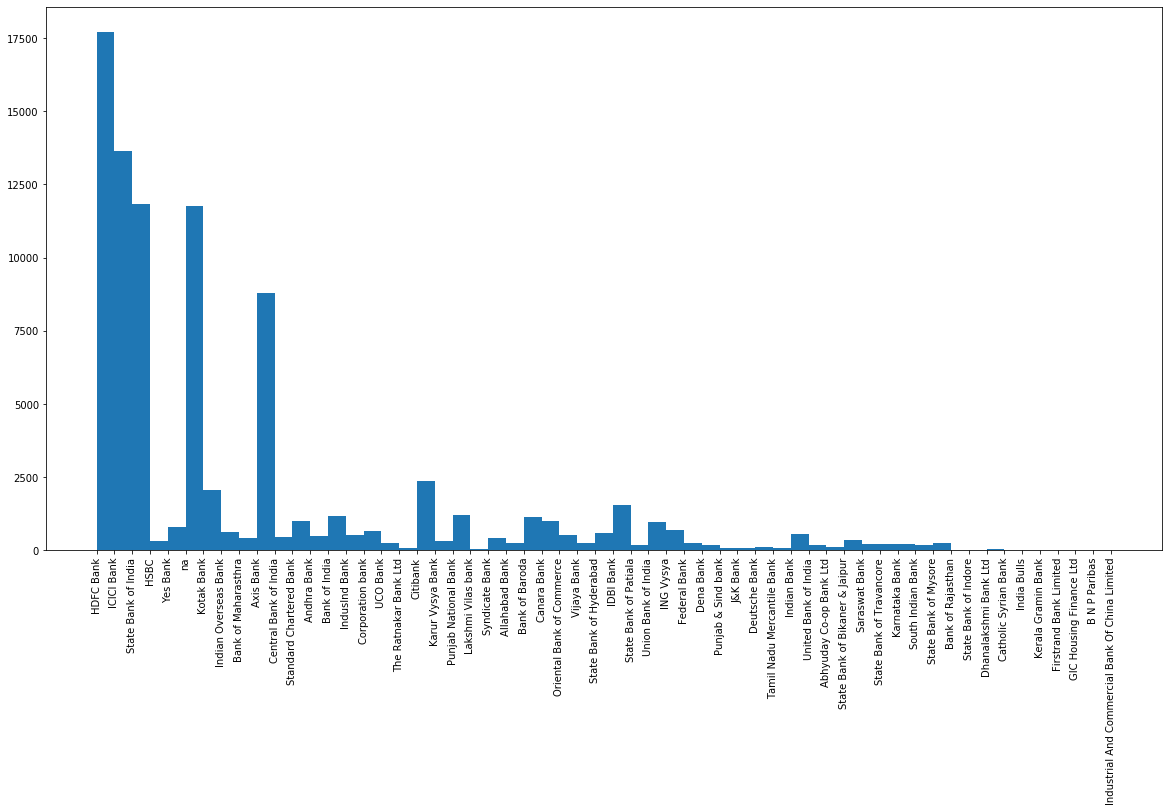

In [77]:
#rozklad zmiennych
plt.figure(figsize=(20,10))
plt.hist(X['Salary_Account'],bins=57)
plt.xticks(rotation='vertical')
#plt.yscale('log')
#plt.xscale('log')

In [ ]:
#PROCESSING NAN
X['Salary_Account'] = X['Salary_Account'].fillna(X['Salary_Account'].mode()[0])

In [78]:
#zmienna Employer_Name
X['Mobile_Verified'].value_counts()

Y    56481
N    30539
Name: Mobile_Verified, dtype: int64

In [79]:
#brakujace wartości
calc_missing_values(X['Mobile_Verified'])

missing percentage: 0.0


In [80]:
#statystyki dla zmiennej 
X['Mobile_Verified'].describe()

count     87020
unique        2
top           Y
freq      56481
Name: Mobile_Verified, dtype: object

(array([30539.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 56481.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

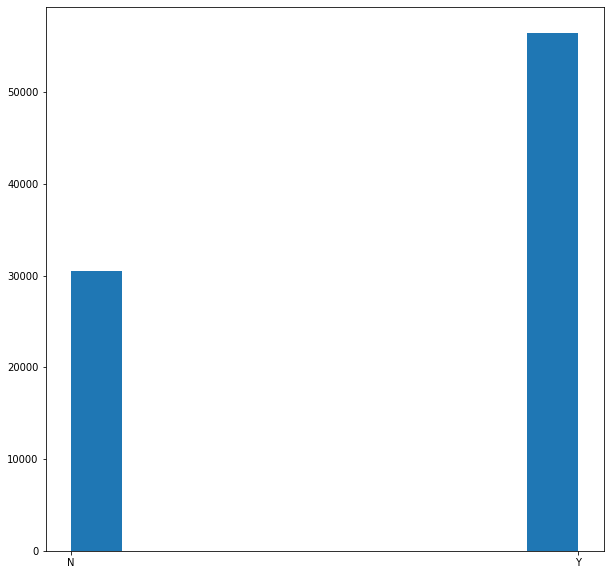

In [81]:
#rozklad zmiennych
plt.figure(figsize=(10,10))
plt.hist(X['Mobile_Verified'],bins=10)
#plt.yscale('log')
#plt.xscale('log')

In [82]:
#Mobile_Verfied encodujemy na 1 - y 0 - n 
X['Mobile_Verified'] = X['Mobile_Verified'].replace({"Y":1, "N":0})

In [83]:
#zmienna Var5 ciagla numerczna
X['Var5'].value_counts()

0     29087
1     12236
3      6759
11     5204
2      4485
14     3662
15     3509
12     2989
13     2622
8      2515
10     2427
9      2281
16     2097
4      1815
17     1691
7      1489
6       983
5       975
18      194
Name: Var5, dtype: int64

In [84]:
#brakujace wartości
calc_missing_values(X['Var5'])

missing percentage: 0.0


In [85]:
#statystyki dla zmiennej 
X['Var5'].describe()

count    87020.000000
mean         4.961503
std          5.670385
min          0.000000
25%          0.000000
50%          2.000000
75%         11.000000
max         18.000000
Name: Var5, dtype: float64

In [86]:
X['Var5'].skew()

0.7606063211426869

(array([29087., 12236.,  4485.,  6759.,  1815.,   975.,   983.,  1489.,
         2515.,     0.,  2281.,  2427.,  5204.,  2989.,  2622.,  3662.,
         3509.,  2097.,  1691.,   194.]),
 array([ 0. ,  0.9,  1.8,  2.7,  3.6,  4.5,  5.4,  6.3,  7.2,  8.1,  9. ,
         9.9, 10.8, 11.7, 12.6, 13.5, 14.4, 15.3, 16.2, 17.1, 18. ]),
 <a list of 20 Patch objects>)

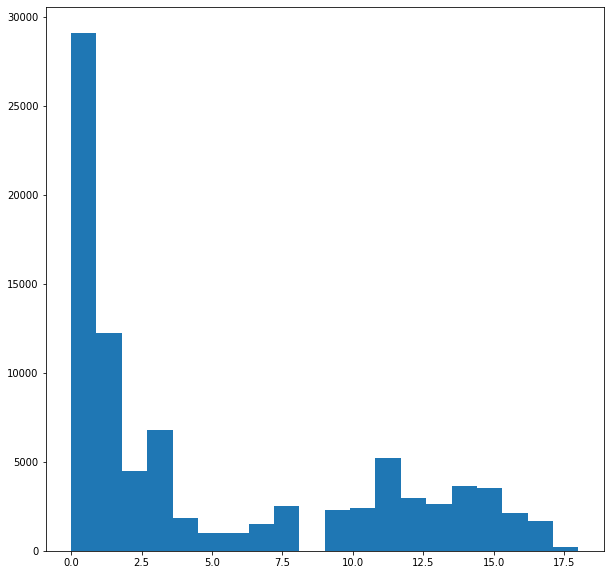

In [87]:
#rozklad zmiennych
plt.figure(figsize=(10,10))
plt.hist(X['Var5'],bins=20)
#plt.yscale('log')
#plt.xscale('log')

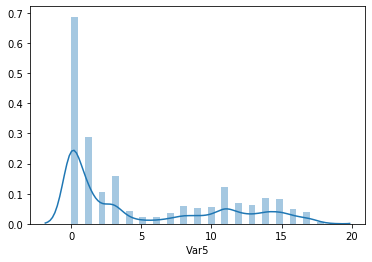

In [88]:
#rozklad zmiennych
import seaborn as sns
sns.distplot(X['Var5'])
#plt.yscale('log')
plt.show()

In [89]:
#zmienna Var1 categorical multiple values
X['Var1'].value_counts()

HBXX    59294
HBXC     9010
HBXB     4479
HAXA     2909
HBXA     2123
HAXB     2011
HBXD     1964
HAXC     1536
HBXH      970
HCXF      722
HAYT      508
HAVC      384
HAXM      268
HCXD      237
HCYS      217
HVYS      186
HAZD      109
HCXG       78
HAXF       15
Name: Var1, dtype: int64

In [90]:
#brakujace wartości
calc_missing_values(X['Var1'])

missing percentage: 0.0


In [91]:
#statystyki dla zmiennej 
X['Var1'].describe()

count     87020
unique       19
top        HBXX
freq      59294
Name: Var1, dtype: object

(array([61417.,  2279., 10974.,  3879.,  4479.,   745.,   570.,   187.,
          939.,  1551.]),
 array([ 0. ,  1.8,  3.6,  5.4,  7.2,  9. , 10.8, 12.6, 14.4, 16.2, 18. ]),
 <a list of 10 Patch objects>)

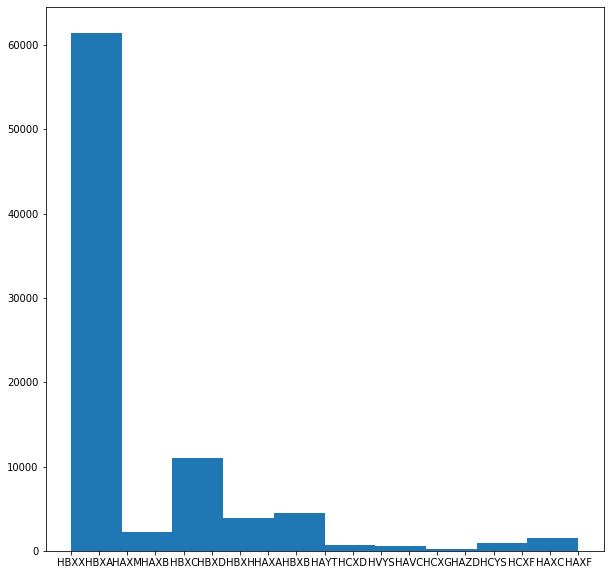

In [92]:
#rozklad zmiennych
plt.figure(figsize=(10,10))
plt.hist(X['Var1'],bins=10)
#plt.yscale('log')
#plt.xscale('log')

In [93]:
#zmienna Loan_Amount_Submitted
X['Loan_Amount_Submitted'].value_counts()

100000.0     6884
200000.0     6583
300000.0     5385
500000.0     4849
1000000.0    1644
             ... 
2470000.0       1
1660000.0       1
1890000.0       1
1990000.0       1
1900000.0       1
Name: Loan_Amount_Submitted, Length: 203, dtype: int64

In [94]:
#brakujace wartości
calc_missing_values(X['Loan_Amount_Submitted'])

missing percentage: 39.775913583084346


In [95]:
#statystyki dla zmiennej 
X['Loan_Amount_Submitted'].describe()

count    5.240700e+04
mean     3.950106e+05
std      3.082481e+05
min      5.000000e+04
25%      2.000000e+05
50%      3.000000e+05
75%      5.000000e+05
max      3.000000e+06
Name: Loan_Amount_Submitted, dtype: float64

In [96]:
X['Loan_Amount_Submitted'].skew()

2.104983545111099

C:\Users\darek\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\darek\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([8.013e+03, 1.728e+03, 8.448e+03, 2.382e+03, 8.926e+03, 4.353e+03,
        2.718e+03, 6.246e+03, 1.206e+03, 9.280e+02, 8.530e+02, 9.060e+02,
        6.700e+02, 4.850e+02, 4.150e+02, 2.510e+02, 1.815e+03, 1.450e+02,
        1.160e+02, 5.630e+02, 9.700e+01, 5.100e+01, 8.600e+01, 5.100e+01,
        6.850e+02, 1.000e+01, 1.900e+01, 1.300e+01, 9.000e+00, 5.500e+01,
        4.000e+00, 6.000e+00, 6.000e+00, 7.200e+01, 3.000e+00, 1.000e+00,
        0.000e+00, 3.000e+00, 5.000e+00, 3.000e+00, 2.000e+00, 4.900e+01,
        1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 7.000e+00]),
 array([  50000.,  109000.,  168000.,  227000.,  286000.,  345000.,
         404000.,  463000.,  522000.,  581000.,  640000.,  699000.,
         758000.,  817000.,  876000.,  935000.,  994000., 1053000.,
        1112000., 1171000., 1230000., 1289000., 1348000., 1407000.,
        1466000., 1525000., 1584000., 1643000., 1702000., 1761000.,
        1820000., 1879000., 1938000.

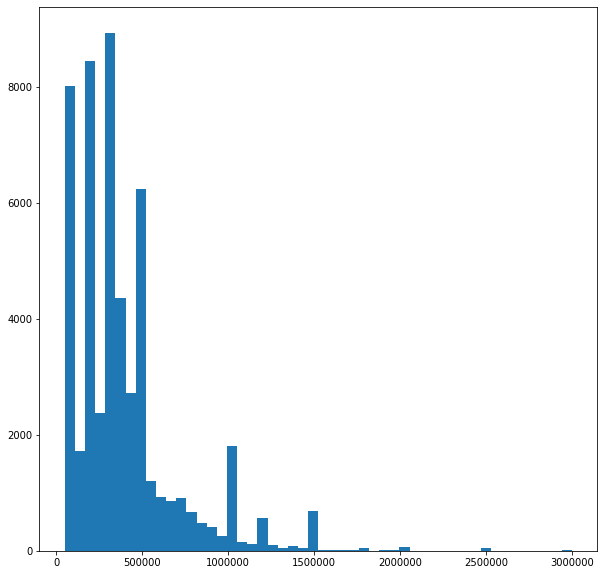

In [97]:
#rozklad zmiennych
plt.figure(figsize=(10,10))
plt.hist(X['Loan_Amount_Submitted'],bins=50)
#plt.yscale('log')
#plt.xscale('log')

In [98]:
#PROCESSING NAN
X['Loan_Amount_Submitted'] = X['Loan_Amount_Submitted'].fillna(X['Loan_Amount_Submitted'].mean())

In [99]:
#PROCESSING SKEWNEES
#rozkład poprawiamy przez log
X['Loan_Amount_Submitted'] = np.log(X['Loan_Amount_Submitted']+0.001)

In [100]:
#zmienna Loan_Tenure_Submitted
X['Loan_Tenure_Submitted'].value_counts()

5.0    20765
4.0    15135
3.0     8858
2.0     5332
1.0     2314
6.0        3
Name: Loan_Tenure_Submitted, dtype: int64

In [101]:
#brakujace wartości
calc_missing_values(X['Loan_Tenure_Submitted'])

missing percentage: 39.775913583084346


In [102]:
#statystyki dla zmiennej 
X['Loan_Tenure_Submitted'].describe()

count    52407.000000
mean         3.891369
std          1.165359
min          1.000000
25%          3.000000
50%          4.000000
75%          5.000000
max          6.000000
Name: Loan_Tenure_Submitted, dtype: float64

In [103]:
X['Loan_Tenure_Submitted'].skew()

-0.8433232334453925

(array([2.3140e+03, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        5.3320e+03, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        8.8580e+03, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.5135e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        2.0765e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 3.0000e+00]),
 array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2,
        2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5,
        3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8,
        4.9, 5. , 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. ]),
 <a list of 50 Patch objects>

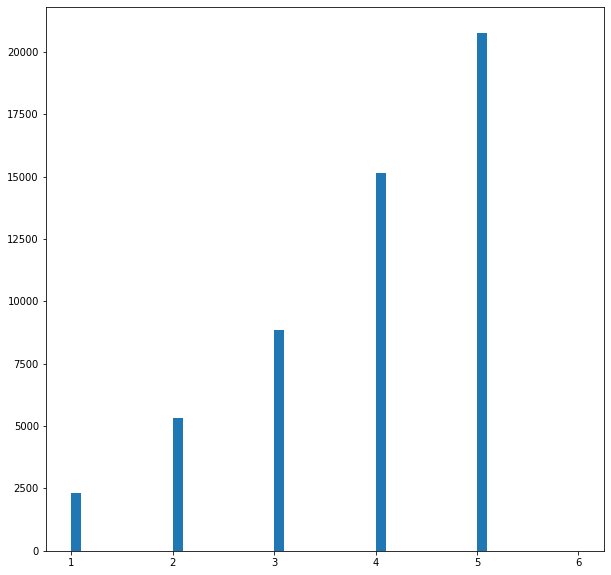

In [104]:
#rozklad zmiennych
plt.figure(figsize=(10,10))
plt.hist(X['Loan_Tenure_Submitted'],bins=50)
#plt.yscale('log')
#plt.xscale('log')

In [105]:
#PROCESSING NAN
#brakujace wartosci uzupelniamy wartoscia srednia zaokraglonoa w gore
X['Loan_Tenure_Submitted'] = X['Loan_Tenure_Submitted'].fillna((np.ceil(X['Loan_Tenure_Submitted'].mean())))

In [106]:
#zmienna Intrest_Rate
X['Interest_Rate'].value_counts()

20.00    4707
14.85    2016
13.99    1699
31.50    1696
15.25    1553
         ... 
14.55       2
20.50       2
15.60       1
14.29       1
15.15       1
Name: Interest_Rate, Length: 73, dtype: int64

In [107]:
#brakujace wartości
calc_missing_values(X['Interest_Rate'])

missing percentage: 68.13835899793152


In [108]:
#statystyki dla zmiennej 
X['Interest_Rate'].describe()

count    27726.000000
mean        19.197474
std          5.834213
min         11.990000
25%         15.250000
50%         18.000000
75%         20.000000
max         37.000000
Name: Interest_Rate, dtype: float64

In [109]:
X['Interest_Rate'].skew()

1.4303011883579213

(array([9.000e+01, 1.910e+02, 1.022e+03, 2.475e+03, 5.650e+02, 2.381e+03,
        1.808e+03, 1.868e+03, 7.940e+02, 1.633e+03, 4.160e+02, 4.300e+02,
        3.092e+03, 3.150e+02, 6.430e+02, 1.860e+02, 4.707e+03, 2.000e+00,
        0.000e+00, 2.100e+01, 6.600e+01, 0.000e+00, 1.500e+01, 8.400e+01,
        6.490e+02, 1.100e+01, 0.000e+00, 6.500e+01, 0.000e+00, 1.600e+01,
        1.970e+02, 2.600e+01, 6.000e+00, 9.500e+02, 4.600e+01, 2.600e+01,
        0.000e+00, 1.300e+01, 5.600e+01, 1.696e+03, 0.000e+00, 2.120e+02,
        1.580e+02, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 4.930e+02,
        0.000e+00, 3.020e+02]),
 array([11.99  , 12.4902, 12.9904, 13.4906, 13.9908, 14.491 , 14.9912,
        15.4914, 15.9916, 16.4918, 16.992 , 17.4922, 17.9924, 18.4926,
        18.9928, 19.493 , 19.9932, 20.4934, 20.9936, 21.4938, 21.994 ,
        22.4942, 22.9944, 23.4946, 23.9948, 24.495 , 24.9952, 25.4954,
        25.9956, 26.4958, 26.996 , 27.4962, 27.9964, 28.4966, 28.9968,
        29.497 , 29.9

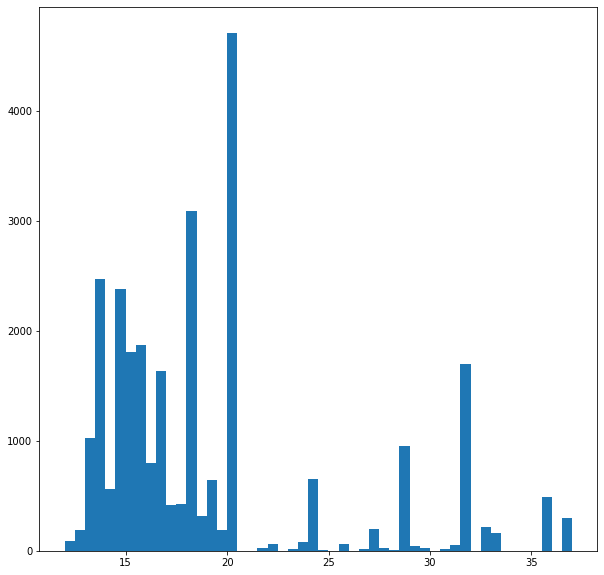

In [110]:
#rozklad zmiennych
plt.figure(figsize=(10,10))
plt.hist(X['Interest_Rate'],bins=50)
#plt.yscale('log')
#plt.xscale('log')

In [111]:
#PROCESSING NAN
#brakujace wartosci uzupelniamy wartoscia srednia
X['Interest_Rate'] = X['Interest_Rate'].fillna((X['Interest_Rate'].mean()))

In [112]:
#zmienna Processing_Fee
X['Processing_Fee'].value_counts()

2000.0     3074
1000.0     2067
4000.0     2006
3000.0     1286
6000.0     1183
           ... 
13464.0       1
3969.0        1
7326.0        1
5920.0        1
9120.0        1
Name: Processing_Fee, Length: 571, dtype: int64

In [113]:
#brakujace wartości
calc_missing_values(X['Processing_Fee'])

missing percentage: 68.49000229832222


In [114]:
#statystyki dla zmiennej 
X['Processing_Fee'].describe()

count    27420.000000
mean      5131.150839
std       4725.837644
min        200.000000
25%       2000.000000
50%       4000.000000
75%       6250.000000
max      50000.000000
Name: Processing_Fee, dtype: float64

In [115]:
X['Processing_Fee'].skew()

2.6801088555079806

(array([1.000e+00, 0.000e+00, 1.900e+01, 6.000e+00, 1.000e+00, 9.000e+00,
        1.500e+01, 4.000e+00, 1.960e+02, 9.000e+00, 1.300e+01, 5.500e+01,
        2.800e+01, 2.200e+01, 2.260e+03, 8.400e+01, 3.420e+02, 1.860e+02,
        9.210e+02, 2.970e+02, 3.305e+03, 4.360e+02, 9.010e+02, 5.650e+02,
        1.883e+03, 1.076e+03, 1.047e+03, 2.931e+03, 1.044e+03, 1.127e+03,
        1.639e+03, 9.740e+02, 8.040e+02, 8.220e+02, 4.890e+02, 1.520e+03,
        3.690e+02, 5.180e+02, 3.130e+02, 2.980e+02, 1.570e+02, 3.220e+02,
        8.000e+01, 9.300e+01, 2.200e+01, 1.560e+02, 1.000e+01, 4.700e+01,
        0.000e+00, 4.000e+00]),
 array([ 5.29831737,  5.40874658,  5.5191758 ,  5.62960502,  5.74003424,
         5.85046346,  5.96089268,  6.0713219 ,  6.18175111,  6.29218033,
         6.40260955,  6.51303877,  6.62346799,  6.73389721,  6.84432642,
         6.95475564,  7.06518486,  7.17561408,  7.2860433 ,  7.39647252,
         7.50690173,  7.61733095,  7.72776017,  7.83818939,  7.94861861,
         8.

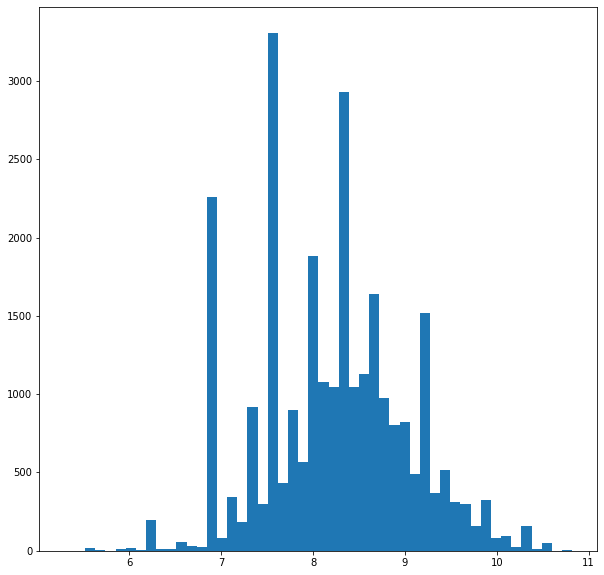

In [116]:
#rozklad zmiennych
plt.figure(figsize=(10,10))
plt.hist(np.log(X['Processing_Fee']),bins=50)
#plt.yscale('log')
#plt.xscale('log')

In [117]:
#PROCESSING NAN
#brakujace wartosci uzupelniamy wartoscia srednia
X['Processing_Fee'] = X['Processing_Fee'].fillna((X['Processing_Fee'].mean()))

In [118]:
#PROCESSING SKEWNEES
#rozkład poprawiamy przez log
X['Processing_Fee'] = np.log(X['Processing_Fee']+0.001)

In [119]:
#zmienna EMI_Loan_Submitted
X['EMI_Loan_Submitted'].value_counts()

3716.36     288
7948.17     252
5089.58     240
5298.78     229
8742.98     218
           ... 
12558.05      1
4530.63       1
46168.22      1
1674.50       1
11463.79      1
Name: EMI_Loan_Submitted, Length: 4530, dtype: int64

In [120]:
#brakujace wartości
calc_missing_values(X['EMI_Loan_Submitted'])

missing percentage: 68.13835899793152


In [121]:
#wyswietl wiersze dla ktorych EMI_Loan_Submitted is nan
X.loc[X['EMI_Loan_Submitted'].isnull()]

,Gender,City,Monthly_Income,DOB,Lead_Creation_Date,Loan_Amount_Applied,Loan_Tenure_Applied,Existing_EMI,Employer_Name,Salary_Account,...,Loan_Tenure_Submitted,Interest_Rate,Processing_Fee,EMI_Loan_Submitted,Filled_Form,Device_Type,Var2,Source,Var4,AGE
0,0,Delhi,9.903488,1978-05-23,2015-05-15,12.611538,5.0,-6.907755,1,HDFC Bank,...,4.0,19.197474,8.543085,NaN,N,Web-browser,G,S122,1,37.000000
2,1,Panchkula,10.021271,1981-10-10,2015-05-19,13.304685,4.0,-6.907755,1,State Bank of India,...,4.0,19.197474,8.543085,NaN,N,Web-browser,B,S143,1,34.000000
3,1,Saharsa,10.463103,1987-11-30,2015-05-09,13.815511,5.0,-6.907755,1,State Bank of India,...,5.0,19.197474,8.543085,NaN,N,Web-browser,B,S143,3,28.000000
4,1,Bengaluru,11.512925,1984-02-17,2015-05-20,13.122363,2.0,10.126631,1,HDFC Bank,...,2.0,19.197474,8.543085,NaN,N,Web-browser,B,S134,3,31.000000
6,0,Sindhudurg,11.156251,1987-10-23,2015-05-01,1.791926,5.0,-6.907755,1,Yes Bank,...,4.0,19.197474,8.543085,NaN,N,Web-browser,B,S133,1,28.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87013,1,Secunderabad,10.085809,1990-01-01,2015-07-31,12.611538,3.0,-6.907755,1,State Bank of India,...,3.0,19.197474,8.543085,NaN,N,Web-browser,G,S122,3,25.000000
87014,0,Pune,10.799576,1982-05-31,2015-07-31,12.899220,5.0,-6.907755,1,ICICI Bank,...,4.0,19.197474,8.543085,NaN,N,Web-browser,G,S122,3,33.000000
87015,0,Ajmer,11.183045,2069-11-27,2015-07-31,13.815511,5.0,9.581904,1,ICICI Bank,...,4.0,19.197474,8.543085,NaN,N,Web-browser,G,S122,3,29.789688
87017,1,Bengaluru,11.678440,1972-01-28,2015-07-31,-6.907755,0.0,-6.907755,1,Syndicate Bank,...,4.0,19.197474,8.543085,NaN,N,Mobile,G,S122,3,43.000000


In [122]:
#statystyki dla zmiennej 
X['EMI_Loan_Submitted'].describe()

count     27726.000000
mean      10999.528377
std        7512.323050
min        1176.410000
25%        6491.600000
50%        9392.970000
75%       12919.040000
max      144748.280000
Name: EMI_Loan_Submitted, dtype: float64

In [123]:
X['EMI_Loan_Submitted'].skew()

2.7549554106213368

C:\Users\darek\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\darek\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([2.737e+03, 4.730e+03, 7.425e+03, 5.652e+03, 2.706e+03, 1.454e+03,
        7.840e+02, 5.970e+02, 4.320e+02, 3.330e+02, 1.720e+02, 2.230e+02,
        1.090e+02, 1.530e+02, 8.000e+01, 3.500e+01, 3.800e+01, 2.200e+01,
        7.000e+00, 9.000e+00, 7.000e+00, 5.000e+00, 9.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([  1176.41  ,   4047.8474,   6919.2848,   9790.7222,  12662.1596,
         15533.597 ,  18405.0344,  21276.4718,  24147.9092,  27019.3466,
         29890.784 ,  32762.2214,  35633.6588,  38505.0962,  41376.5336,
         44247.971 ,  47119.4084,  49990.8458,  52862.2832,  55733.7206,
         58605.158 ,  61476.5954,  64348.0328,  67219.4702,  70090.9076,
         72

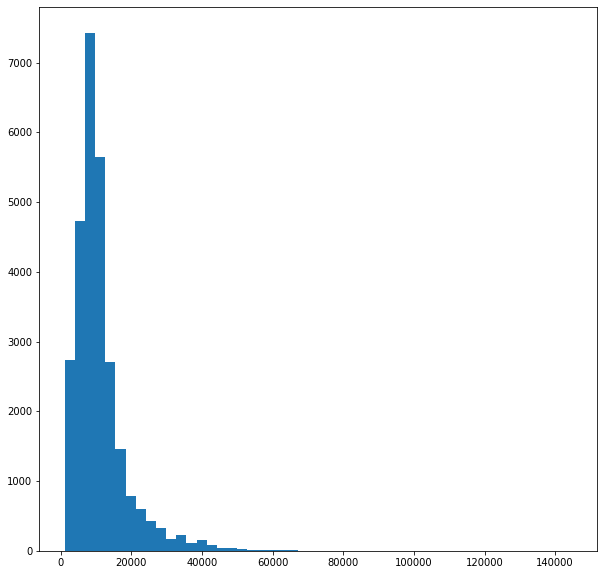

In [124]:
#rozklad zmiennych
plt.figure(figsize=(10,10))
plt.hist(X['EMI_Loan_Submitted'],bins=50)
#plt.yscale('log')
#plt.xscale('log')

In [125]:
#PROCESSING NAN
#brakujace wartosci uzupelniamy wartoscia srednia
X['EMI_Loan_Submitted'] = X['EMI_Loan_Submitted'].fillna((X['EMI_Loan_Submitted'].mean()))

In [126]:
#PROCESSING SKEWNEES
#rozkład poprawiamy przez log
X['EMI_Loan_Submitted'] = np.log(X['EMI_Loan_Submitted']+0.001)

In [127]:
#zmienna Filled_Form
X['Filled_Form'].value_counts()

N    67530
Y    19490
Name: Filled_Form, dtype: int64

In [128]:
#brakujace wartości
calc_missing_values(X['Filled_Form'])

missing percentage: 0.0


In [129]:
#statystyki dla zmiennej 
X['Filled_Form'].describe()

count     87020
unique        2
top           N
freq      67530
Name: Filled_Form, dtype: object

(array([67530.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 19490.]),
 array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
        0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
        0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64,
        0.66, 0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86,
        0.88, 0.9 , 0.92, 0.94, 0.96, 0.98, 1.  ]),
 <a list of 50 Patch objects>)

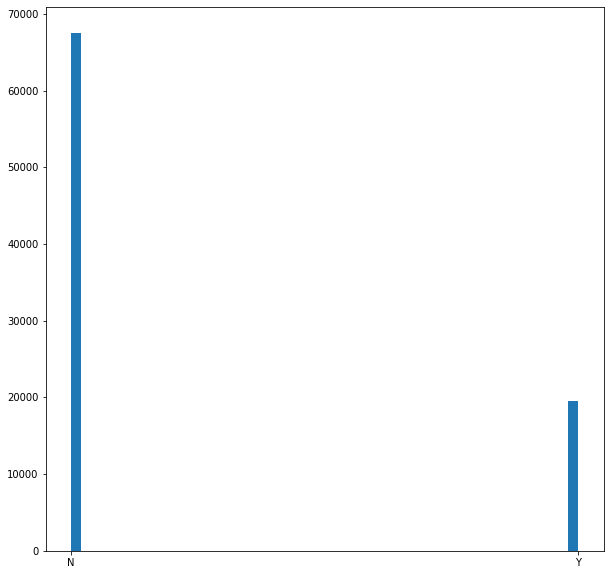

In [130]:
#rozklad zmiennych
plt.figure(figsize=(10,10))
plt.hist(X['Filled_Form'],bins=50)
#plt.yscale('log')
#plt.xscale('log')


In [131]:
#Mobile_Verfied encodujemy na 1 - y 0 - n 
X['Filled_Form'] = X['Filled_Form'].replace({"Y":1, "N":0})

In [132]:
#zmienna Device_Type
X['Device_Type'].value_counts()

Web-browser    64316
Mobile         22704
Name: Device_Type, dtype: int64

In [133]:
#brakujace wartości
calc_missing_values(X['Device_Type'])

missing percentage: 0.0


In [134]:
#statystyki dla zmiennej 
X['Device_Type'].describe()

count           87020
unique              2
top       Web-browser
freq            64316
Name: Device_Type, dtype: object

(array([64316.,     0., 22704.]),
 array([0.        , 0.33333333, 0.66666667, 1.        ]),
 <a list of 3 Patch objects>)

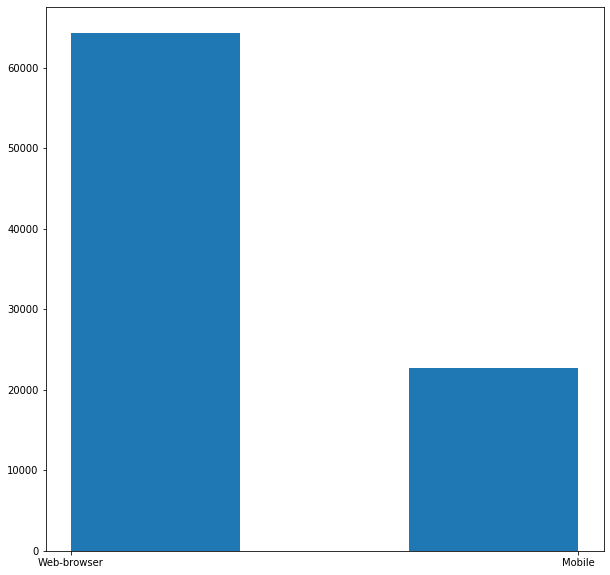

In [135]:
#rozklad zmiennych
plt.figure(figsize=(10,10))
plt.hist(X['Device_Type'],bins=3)
#plt.yscale('log')
#plt.xscale('log')

In [136]:
#Mobile_Verfied encodujemy na 1 - y 0 - n 
X['Device_Type'] = X['Device_Type'].replace({"Web-browser":1, "Mobile":0})

In [137]:
#zmienna Var2 - categorical multiple level
X['Var2'].value_counts()

B    37280
G    33032
C    14210
E     1315
D      634
F      544
A        5
Name: Var2, dtype: int64

In [138]:
#brakujace wartości
calc_missing_values(X['Var2'])

missing percentage: 0.0


In [139]:
#statystyki dla zmiennej 
X['Var2'].describe()

count     87020
unique        7
top           B
freq      37280
Name: Var2, dtype: object

(array([3.3032e+04, 3.7280e+04, 1.4210e+04, 0.0000e+00, 1.3150e+03,
        5.4400e+02, 6.3400e+02, 5.0000e+00]),
 array([0.  , 0.75, 1.5 , 2.25, 3.  , 3.75, 4.5 , 5.25, 6.  ]),
 <a list of 8 Patch objects>)

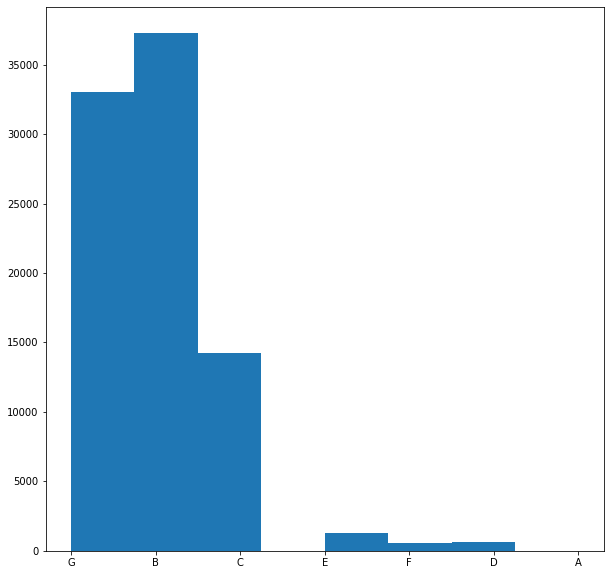

In [140]:
#rozklad zmiennych
plt.figure(figsize=(10,10))
plt.hist(X['Var2'],bins=8)
#plt.yscale('log')
#plt.xscale('log')

In [141]:
#zmienna Source categorical multiple level
X['Source'].value_counts()

S122    38567
S133    29885
S159     5599
S143     4332
S127     1931
S137     1724
S134     1301
S161      769
S151      720
S157      650
S153      494
S156      308
S144      299
S158      208
S123       73
S141       57
S162       36
S124       24
S160       11
S150       10
S155        4
S136        3
S139        3
S129        3
S138        3
S135        2
S130        1
S140        1
S154        1
S125        1
Name: Source, dtype: int64

In [142]:
#brakujace wartości
calc_missing_values(X['Source'])

missing percentage: 0.0


In [143]:
#statystyki dla zmiennej 
X['Source'].describe()

count     87020
unique       30
top        S122
freq      38567
Name: Source, dtype: object

(array([3.8567e+04, 4.3320e+03, 1.3010e+03, 2.9885e+04, 5.5990e+03,
        7.2000e+02, 1.7240e+03, 1.9310e+03, 2.9900e+02, 7.3000e+01,
        3.0800e+02, 4.9400e+02, 2.4000e+01, 7.6900e+02, 3.0000e+00,
        0.0000e+00, 1.0000e+00, 6.5000e+02, 3.0000e+00, 3.6000e+01,
        5.7000e+01, 2.0800e+02, 1.0000e+00, 3.0000e+00, 3.0000e+00,
        1.0000e+00, 4.0000e+00, 1.1000e+01, 1.0000e+01, 2.0000e+00,
        1.0000e+00]),
 array([ 0.        ,  0.93548387,  1.87096774,  2.80645161,  3.74193548,
         4.67741935,  5.61290323,  6.5483871 ,  7.48387097,  8.41935484,
         9.35483871, 10.29032258, 11.22580645, 12.16129032, 13.09677419,
        14.03225806, 14.96774194, 15.90322581, 16.83870968, 17.77419355,
        18.70967742, 19.64516129, 20.58064516, 21.51612903, 22.4516129 ,
        23.38709677, 24.32258065, 25.25806452, 26.19354839, 27.12903226,
        28.06451613, 29.        ]),
 <a list of 31 Patch objects>)

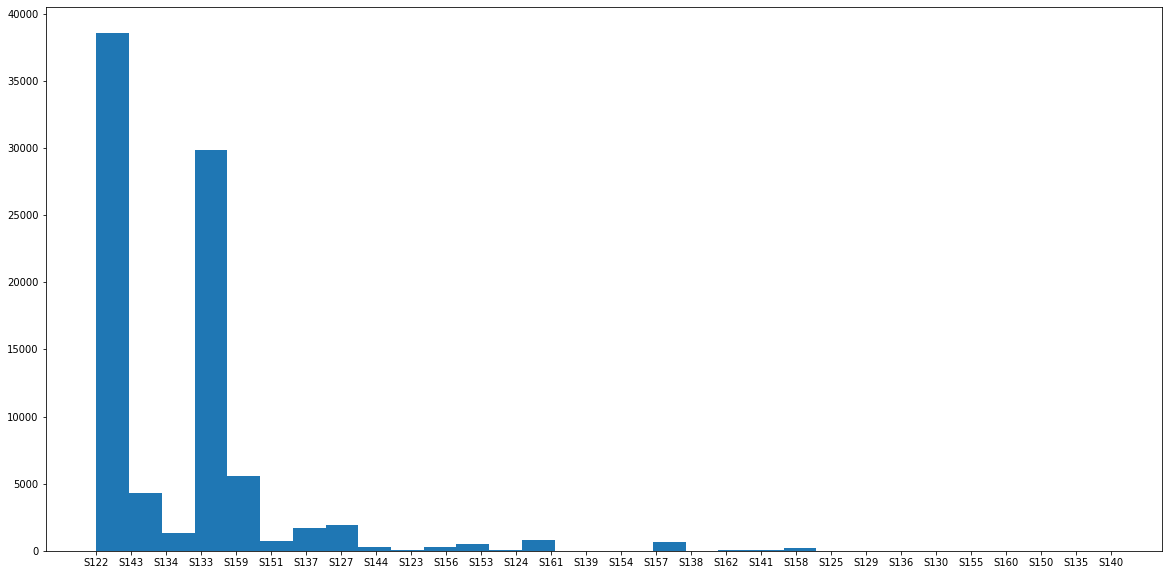

In [144]:
#rozklad zmiennych
plt.figure(figsize=(20,10))
plt.hist(X['Source'],bins=31)
#plt.yscale('log')
#plt.xscale('log')

In [145]:
#zmienna Var4 categorical multiple level
X['Var4'].value_counts()

3    25260
1    23906
5    20266
4     6577
2     5931
0     2546
7     2302
6      232
Name: Var4, dtype: int64

In [146]:
#brakujace wartości
calc_missing_values(X['Var4'])

missing percentage: 0.0


In [147]:
#statystyki dla zmiennej 
X['Var4'].describe()

count    87020.000000
mean         2.949805
std          1.697720
min          0.000000
25%          1.000000
50%          3.000000
75%          5.000000
max          7.000000
Name: Var4, dtype: float64

(array([ 2546.,     0.,     0.,     0., 23906.,     0.,     0.,     0.,
         5931.,     0.,     0.,     0.,     0., 25260.,     0.,     0.,
            0.,  6577.,     0.,     0.,     0.,     0., 20266.,     0.,
            0.,     0.,   232.,     0.,     0.,     0.,  2302.]),
 array([0.        , 0.22580645, 0.4516129 , 0.67741935, 0.90322581,
        1.12903226, 1.35483871, 1.58064516, 1.80645161, 2.03225806,
        2.25806452, 2.48387097, 2.70967742, 2.93548387, 3.16129032,
        3.38709677, 3.61290323, 3.83870968, 4.06451613, 4.29032258,
        4.51612903, 4.74193548, 4.96774194, 5.19354839, 5.41935484,
        5.64516129, 5.87096774, 6.09677419, 6.32258065, 6.5483871 ,
        6.77419355, 7.        ]),
 <a list of 31 Patch objects>)

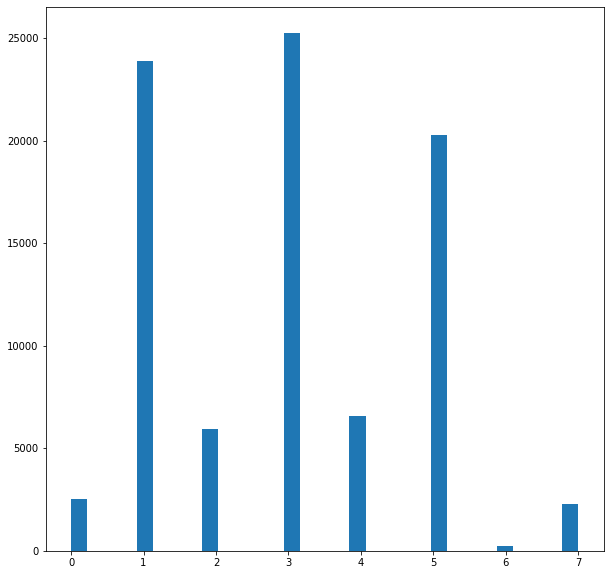

In [148]:
#rozklad zmiennych
plt.figure(figsize=(10,10))
plt.hist(X['Var4'],bins=31)
#plt.yscale('log')
#plt.xscale('log')

## zaczynamy modelowanie

In [149]:
#wstepne modeloweanie przy zalozeniu ze zmienne mamy oczyszczone, przygotowane w pierwszej czesci notebooka

In [150]:
X.shape

(87020, 24)

In [151]:
#dane mamy pozbabione nan oczysczone itd, one-hot dla zmiennych kategorycznych
#X = pd.get_dummies(X.drop(["name","ticket","home.dest", "survived"], 
#                            axis=1)
#                  )
X = pd.get_dummies(X.drop(["DOB", "Lead_Creation_Date"], axis=1)
                  )

In [152]:
X.shape

(87020, 828)

In [153]:
pd.set_option('display.max_rows', 200)
X.dtypes

Gender                   int64
Monthly_Income         float64
Loan_Amount_Applied    float64
Loan_Tenure_Applied    float64
Existing_EMI           float64
                        ...   
Source_S158              uint8
Source_S159              uint8
Source_S160              uint8
Source_S161              uint8
Source_S162              uint8
Length: 828, dtype: object

In [154]:
np.all(np.isfinite(X))

True

In [155]:
from sklearn.model_selection import StratifiedKFold

seed=123
kfold = StratifiedKFold(n_splits=5, random_state=seed)

C:\Users\darek\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [156]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=seed)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

pipelines = [
            Pipeline([
    ("scaler", StandardScaler()),
    ("model", LogisticRegression(max_iter=500, verbose=1,n_jobs=14))
]),
            Pipeline([
    ("scaler", StandardScaler()),
    ("model", SVC(verbose=True,random_state=seed))
])  
      
    #Pipeline([
    #("model", RandomForestClassifier(max_features=0.5,verbose=True,n_jobs=-1))
#])
    ]


param_grids = [{"model__penalty": ["l2"],
                "model__C": [0.01, 0.1, 1, 10, 100]},
               
               {'model__gamma': [0.001, 1],
                'model__C': [0.001, 1]}
               
#          {"model__n_estimators" : [50, 100, 150],
#                "model__min_samples_leaf": [1, 2, 5],
#                "model__min_samples_split": [2, 4],
#                "model__max_depth": [25, 50, 100]
#               }
              ]

best_classifier = []

for model, grid in zip(pipelines, param_grids):
    gs = GridSearchCV(model, grid, cv = 10,n_jobs=-1)
    gs.fit(X_train, y_train)
    print(accuracy_score(y_test, gs.predict(X_test)))
    best_classifier.append(gs)


[Parallel(n_jobs=14)]: Using backend LokyBackend with 14 concurrent workers.
[Parallel(n_jobs=14)]: Done   1 out of   1 | elapsed:   41.8s finished


0.9846012410940014


In [ ]:
gs.best_params_

In [ ]:
best_classifier

In [ ]:
#cross_val_predict na zbiorze treningowym, narazie nie ruszamy zbioru testowego
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(gs.best_estimator_, X_train, y_train, cv=3)
confusion_matrix(y_train, y_train_pred)

In [ ]:
from sklearn.metrics import precision_score, recall_score
print(precision_score(y_train, y_train_pred)) 
print(recall_score(y_train, y_train_pred)) 

In [ ]:
#ROC curve
y_pred = gs.best_estimator_.predict(X_test)
print(y_pred)

y_scores = gs.best_estimator_.decision_function(X_test)
print(y_scores)

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

fpr_clf_1, tpr_clf_1, thresholds_clf_1 = roc_curve(y_test, y_scores)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr_clf_1, tpr_clf_1, "logistic regression")
plt.legend(loc="lower right", fontsize=16)
plt.show()

In [ ]:
#musimy zrobic imputery dla zmiennych numerycznych, kategroycznych i jak cos wymaga specjalnej operacji to funkcji do
#tego, wszystko ma się liczyć automatycznie, z posprzataniem danych wlacznie

In [ ]:
#selektor do wybierania kolumn
from sklearn.base import BaseEstimator, TransformerMixin

# A class to select numerical or categorical columns 
# since Scikit-Learn doesn't handle DataFrames yet
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names]

In [ ]:
#imputer do przetwarzania zmiennych o popsutym rozkładzie

class NormalityImputer(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
        print('init')
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        X_copy = X.copy()
        for name in self.attribute_names:
            print(name)
            X_copy.loc[(X_copy[name] == 0), name ] = 0.000001
            X_copy[name] = np.log(X_copy[name])
        return X_copy

In [ ]:
#imputer dla zmiennych numerycznych
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

numeric_features = ['Monthly_Income','Loan_Amount_Applied']


num_pipeline = Pipeline([
        ("select_numeric", PowerImputer(numeric_features)),
        #("imputer", SimpleImputer(strategy="median")),
    ])

In [ ]:
income_fixed = num_pipeline.fit_transform(X)
#income_fixed['Monthly_Income'].describe()
income_fixed['Monthly_Income'].describe()

In [ ]:
np.log(0.00001)

In [ ]:
income_fixed['Monthly_Income'].skew()
income_fixed['Loan_Tenure_Applied'].skew()

In [ ]:
#rozklad zmiennych
plt.figure(figsize=(10,10))
plt.hist(income_fixed['Monthly_Income'],bins=100)
plt.yscale('log')
#plt.xscale('log')

In [ ]:
# Inspired from stackoverflow.com/questions/25239958
class MostFrequentImputer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        self.most_frequent_ = pd.Series([X[c].value_counts().index[0] for c in X],
                                        index=X.columns)
        return self
    def transform(self, X, y=None):
        return X.fillna(self.most_frequent_)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
from sklearn.model_selection import StratifiedKFold
seed=123
kfold = StratifiedKFold(n_splits=5, random_state=seed)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Imputer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

pipe = Pipeline([('imputer', Imputer(missing_values='NaN', strategy='mean', axis=0)), 
                 ('preprocessing', StandardScaler()), 
                 ('classifier', SVC())])

param_grid = {
            'imputer__strategy': ['mean', 'median', 'most_frequent'],
            'preprocessing': [StandardScaler(), None],
            'classifier__gamma': [0.001, 0.01, 0.1, 1, 10, 100],
            'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100]
}

grid_1 = GridSearchCV(pipe, param_grid, cv=kfold, return_train_score=True)

grid_1.fit(X_train, y_train)
grid_1.best_params_

In [ ]:
#moduelujemy najpierw bez automatycznego preprocessingu - imputerow
gs.best_estimator_

In [ ]:
from sklearn import  metrics


models = []
models.append(('Logistic Regression', gs.best_estimator_))



precision_score = []
recall_score = []
f1_score = []
accuracy_score = []
for name, model in models:
    print(name)
    print("precision_score: {}".format(metrics.precision_score(y_test, model.predict(X_test)) ))
    print("recall_score: {}".format( metrics.recall_score(y_test, model.predict(X_test)) ))
    print("f1_score: {}".format( metrics.f1_score(y_test, model.predict(X_test)) ))
    print("accuracy_score: {}".format( metrics.accuracy_score(y_test, model.predict(X_test)) ))
    print("auc_score: {}".format( metrics.roc_auc_score(y_test, model.predict(X_test)) ))
    precision_score.append(metrics.precision_score(y_test, model.predict(X_test)))
    recall_score.append(metrics.recall_score(y_test, model.predict(X_test)))
    f1_score.append( metrics.f1_score(y_test, model.predict(X_test)))
    accuracy_score.append(metrics.accuracy_score(y_test, model.predict(X_test)))
    accuracy_score.append(metrics.roc_auc_score(y_test, model.predict(X_test)))

In [ ]:
import pandas as pd
d = {'precision_score': precision_score, 
     'recall_score': recall_score, 
     'f1_score': f1_score,
     'accuracy_score' : accuracy_score
    }
df = pd.DataFrame(data=d)
df.insert(loc=0, column='Method', value=['Logistic Regression'])
df

In [ ]:
import seaborn_qqplot as sqp
from scipy.stats import gamma
sqp.qqplot(x,
                   x='Processing_Fee',
                   y=gamma,
                   aspect=2.5,
                   height = 4,
                   display_kws={"identity":True} 
          )
plt.title("QQ Plot")
plt.show()

In [ ]:
import seaborn_qqplot as sqp
from scipy.stats import gamma
sqp.qqplot(X,
                   x='EMI_Loan_Submitted',
                   y=gamma,
                   aspect=2.5,
                   height = 4,
                   display_kws={"identity":True} 
          )
plt.title("QQ Plot")
plt.show()

In [ ]:
import seaborn_qqplot as sqp
from scipy.stats import gamma
sqp.qqplot(X,
                   x='Monthly_Income',
                   y=gamma,
                   aspect=2.5,
                   height = 4,
                   display_kws={"identity":True} 
          )
plt.title("QQ Plot")
plt.show()

In [ ]:
# Produce a scatter matrix for each pair of features in the data
from pandas.plotting import scatter_matrix
scatter_matrix(X, alpha = 0.3, figsize = (24,20), diagonal = 'kde');



In [ ]:
import seaborn as sns
indices = [52, 70, 77]
percentiles_data = X.rank(pct=True)
percentiles_samples = percentiles_data.iloc[indices]

sns.heatmap(percentiles_samples, annot=True)

In [ ]:
import seaborn as sns
plt.figure(figsize=(20,15))
dcorr = x.corr()
sns.heatmap(dcorr, xticklabels=dcorr.columns,yticklabels=dcorr.columns, square=True, annot=True,cbar=False)